# KNN CLASSIFIER

## IMPORTING THE MAJOR LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r"C:\module 7\breast-cancer-wisconsin.csv", header = None)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


## EDA

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [13]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [15]:
df.columns = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Shape', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

In [17]:
df

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Shape,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [19]:
df.drop('Id', axis  = 1, inplace = True)

In [21]:
df

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Shape,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Clump_thickness               699 non-null    int64 
 1   Uniformity_Cell_Size          699 non-null    int64 
 2   Uniformity_Cell_Shape         699 non-null    int64 
 3   Marginal_Adhesion             699 non-null    int64 
 4   Single_Epithelial_Cell_Shape  699 non-null    int64 
 5   Bare_Nuclei                   699 non-null    object
 6   Bland_Chromatin               699 non-null    int64 
 7   Normal_Nucleoli               699 non-null    int64 
 8   Mitoses                       699 non-null    int64 
 9   Class                         699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [35]:
for var in df.columns:
    print(df[var].value_counts())

Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_Cell_Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Shape
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland_Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10


In [41]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors = 'coerce')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Clump_thickness               699 non-null    int64  
 1   Uniformity_Cell_Size          699 non-null    int64  
 2   Uniformity_Cell_Shape         699 non-null    int64  
 3   Marginal_Adhesion             699 non-null    int64  
 4   Single_Epithelial_Cell_Shape  699 non-null    int64  
 5   Bare_Nuclei                   683 non-null    float64
 6   Bland_Chromatin               699 non-null    int64  
 7   Normal_Nucleoli               699 non-null    int64  
 8   Mitoses                       699 non-null    int64  
 9   Class                         699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [45]:
df.isnull().sum()

Clump_thickness                  0
Uniformity_Cell_Size             0
Uniformity_Cell_Shape            0
Marginal_Adhesion                0
Single_Epithelial_Cell_Shape     0
Bare_Nuclei                     16
Bland_Chromatin                  0
Normal_Nucleoli                  0
Mitoses                          0
Class                            0
dtype: int64

In [47]:
df.isna().sum()

Clump_thickness                  0
Uniformity_Cell_Size             0
Uniformity_Cell_Shape            0
Marginal_Adhesion                0
Single_Epithelial_Cell_Shape     0
Bare_Nuclei                     16
Bland_Chromatin                  0
Normal_Nucleoli                  0
Mitoses                          0
Class                            0
dtype: int64

## FREQUENCY DISTRIBUTION OF TARGET CLASS

In [50]:
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [52]:
df['Class'].value_counts() / float(len(df))

Class
2    0.655222
4    0.344778
Name: count, dtype: float64

## OUTLIERS IN DATA

In [55]:
round(df.describe(), 2)

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Shape,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.00,699.00,699.00,699.00,699.00,683.00,699.00,699.00,699.00,699.00
mean,4.42,3.13,3.21,2.81,3.22,3.54,3.44,2.87,1.59,2.69
std,2.82,3.05,2.97,2.86,2.21,3.64,2.44,3.05,1.72,0.95
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00
25%,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00
50%,4.00,1.00,1.00,1.00,2.00,1.00,3.00,1.00,1.00,2.00
75%,6.00,5.00,5.00,4.00,4.00,6.00,5.00,4.00,1.00,4.00
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,4.00


## DATA VISUALIZATION

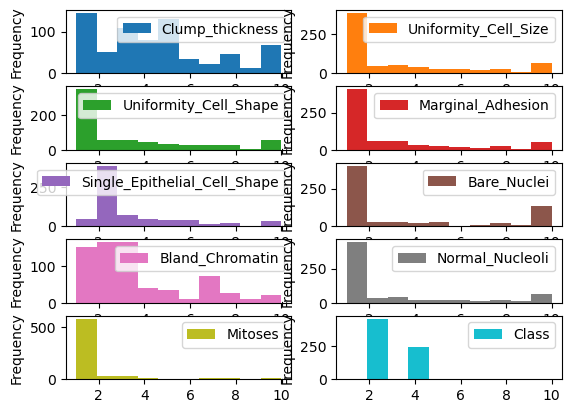

In [60]:
df.plot(kind = 'hist', bins = 10, subplots = True, layout = (5,2), sharex = False, sharey = False)
plt.show()

## ESTIMATION OF CORRELATION COEFFICIENTS

In [63]:
correlation = df.corr()

In [65]:
correlation['Class'].sort_values(ascending = False)

Class                           1.000000
Bare_Nuclei                     0.822696
Uniformity_Cell_Shape           0.818934
Uniformity_Cell_Size            0.817904
Bland_Chromatin                 0.756616
Clump_thickness                 0.716001
Normal_Nucleoli                 0.712244
Marginal_Adhesion               0.696800
Single_Epithelial_Cell_Shape    0.682785
Mitoses                         0.423170
Name: Class, dtype: float64

## CORRELATION HEATMAP

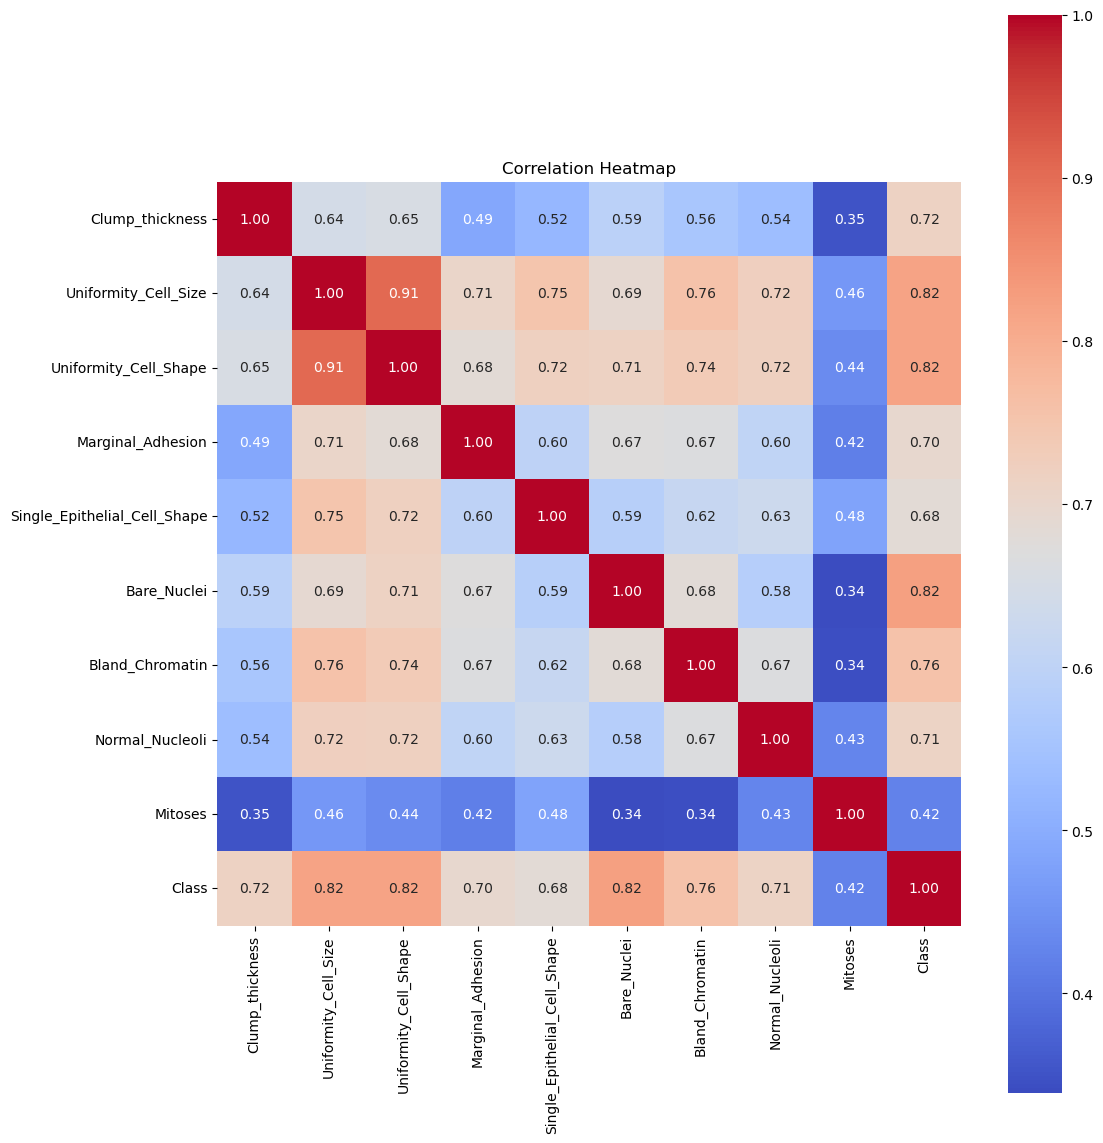

In [74]:
plt.figure(figsize = (12,14))
plt.title('Correlation Heatmap')
sns.heatmap(correlation, square = True, annot = True, fmt = '.2f', linecolor = 'white', cmap = 'coolwarm')
plt.show()

## DECLARING FEATURE AND TARGET VARIABLES

In [77]:
from sklearn.model_selection import train_test_split

In [79]:
x = df.drop(['Class'], axis = 1)
y = df['Class']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [83]:
x_train.shape

(559, 9)

In [85]:
x_test.shape

(140, 9)

In [87]:
y_train.shape

(559,)

In [89]:
y_test.shape

(140,)

## FEATURE ENGINEERING

In [92]:
x_train.isnull().sum()

Clump_thickness                  0
Uniformity_Cell_Size             0
Uniformity_Cell_Shape            0
Marginal_Adhesion                0
Single_Epithelial_Cell_Shape     0
Bare_Nuclei                     13
Bland_Chromatin                  0
Normal_Nucleoli                  0
Mitoses                          0
dtype: int64

## MEDIAN IMPUTATION

In [95]:
for df1 in [x_train, x_test]:
    for col in x_train.columns:
        col_median = x_train[col].median()
        df1[col].fillna(col_median, inplace = True)

C:\Users\aride\AppData\Local\Temp\ipykernel_11480\1424460430.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(col_median, inplace = True)


In [97]:
x_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Shape    0
Bare_Nuclei                     0
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [99]:
x_train

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Shape,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1
...,...,...,...,...,...,...,...,...,...
359,10,3,5,4,3,7.0,3,5,3
192,5,1,1,1,2,1.0,2,1,1
629,4,1,1,1,2,1.0,1,1,1
559,5,1,1,1,2,1.0,2,1,1


In [101]:
x_test

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Shape,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
476,4,1,2,1,2,1.0,1,1,1
531,4,2,2,1,2,1.0,2,1,1
40,6,6,6,9,6,1.0,7,8,1
432,5,1,1,1,2,1.0,2,2,1
14,8,7,5,10,7,9.0,5,5,4
...,...,...,...,...,...,...,...,...,...
310,2,1,1,1,3,1.0,2,1,1
644,2,1,1,1,2,1.0,1,1,1
523,7,5,6,10,4,10.0,5,3,1
470,3,1,1,1,1,1.0,2,1,1


## FEATURE SCALING

In [104]:
cols = x_train.columns

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [112]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [116]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258
...,...,...,...,...,...,...,...,...,...
554,2.028383,-0.026856,0.625406,0.422458,-0.089865,1.017206,-0.159953,0.690648,0.888185
555,0.233723,-0.679581,-0.717925,-0.622471,-0.546543,-0.665096,-0.577774,-0.608165,-0.324258
556,-0.125209,-0.679581,-0.717925,-0.622471,-0.546543,-0.665096,-0.995595,-0.608165,-0.324258
557,0.233723,-0.679581,-0.717925,-0.622471,-0.546543,-0.665096,-0.577774,-0.608165,-0.324258


## FITTING KNN = 3

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [123]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [125]:
y_pred = knn.predict(x_test)
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

In [127]:
from sklearn.metrics import accuracy_score

In [129]:
accuracy_score(y_test, y_pred)

0.9714285714285714

In [131]:
y_pred_train = knn.predict(x_train)

In [135]:
accuracy_score(y_train, y_pred_train)

0.9821109123434705

## KNN = 5

In [144]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))
y_pred_train = knn.predict(x_train)
print(accuracy_score(y_train, y_pred_train))

0.9714285714285714
0.9695885509838998


## KNN = 8

In [147]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))
y_pred_train = knn.predict(x_train)
print(accuracy_score(y_train, y_pred_train))

0.9785714285714285
0.9695885509838998
